# Classify handwritten digits using the famous MNIST data
The goal is to take a handwritten single digit and recognize it. The were taken from MINISt datset which is also available as one of Kaggle competitions: https://www.kaggle.com/c/digit-recognizer/data.
The approach for this computer vision problem is to train a convolutional neural network based on the Keras package.


Importing necessary libraries:

In [119]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten,  Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, \
                                       ZeroPadding2D
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn import manifold
np.random.seed(1337)

Importing dataset:

In [2]:
df=pd.read_csv('train.csv',header=None)
XTest=pd.read_csv('test.csv',header=None)

Separate the train set to the X that contains the images of digits and y that has the labels of images:

In [121]:
y=df.iloc[0:48000,0]
X=df.iloc[0:48000,1::]

Divide the data to train and test set:

In [122]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=2, test_size=0.2)
print(Xtrain.shape, Xtest.shape)

(33600, 784) (8400, 784)


Build and compile the convolutional network:

In [5]:
batch_size = 128
nb_classes = 10
nb_epoch = 10
# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (1, img_rows, img_cols)
# number of convolutional filters to use
nb_filters = 32

model = Sequential()
model.add(Convolution2D(nb_filters, 3, 3,
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
#model.load_weights('C:/Kaggle/tmp/weights3.hdf5')

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Reshape the X and y to feed into the convolutional neural network.
X (images) are reshaped to 28 x 28, and y (labels) changed to 10-columns binary matrix, which each column is realted to a class:

In [125]:
X_train=np.array(Xtrain).reshape(len(Xtrain),1,28,28)
X_test=np.array(Xtest).reshape(len(Xtest),1,28,28)
X_Test=np.array(XTest).reshape(len(XTest),1,28,28)
Ytest=np.zeros((len(ytest),10))
for i in range(len(ytest)):
    Ytest[i,ytest.iloc[i]]=1
Ytrain=np.zeros((len(ytrain),10))
for i in range(len(ytrain)):
    Ytrain[i,ytrain.iloc[i]]=1

Train the model:

In [7]:
from keras.callbacks import ModelCheckpoint
callbacks = [ModelCheckpoint(filepath="C:/Kaggle/tmp/weights1.hdf5", verbose=1,  save_weights_only=True)]
model.fit(X_train, Ytrain, 
          batch_size=batch_size, 
          nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Ytest),callbacks=callbacks)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 85s - loss: 4.9185 - acc: 0.6348 - val_loss: 0.1441 - val_acc: 0.9612
Epoch 2/10
33600/33600 [==============================] - 92s - loss: 0.1957 - acc: 0.9465 - val_loss: 0.0958 - val_acc: 0.9721
Epoch 3/10
33600/33600 [==============================] - 98s - loss: 0.1363 - acc: 0.9622 - val_loss: 0.0865 - val_acc: 0.9762
Epoch 4/10
33600/33600 [==============================] - 103s - loss: 0.1107 - acc: 0.9688 - val_loss: 0.0723 - val_acc: 0.9796
Epoch 5/10
33600/33600 [==============================] - 111s - loss: 0.0954 - acc: 0.9737 - val_loss: 0.0780 - val_acc: 0.9775
Epoch 6/10
33600/33600 [==============================] - 112s - loss: 0.0873 - acc: 0.9763 - val_loss: 0.0744 - val_acc: 0.9821
Epoch 7/10
33600/33600 [==============================] - 115s - loss: 0.0800 - acc: 0.9779 - val_loss: 0.0877 - val_acc: 0.9795
Epoch 8/10
33600/33600 [===========================

Calculating the score and accuracy of cross-valication set:

In [126]:
score = model.evaluate(X_test, Ytest, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0675113362031
Test accuracy: 0.983571428571


Calulate the presecion, recal and f-score:

In [132]:
from sklearn.metrics import classification_report
ypred=model.predict(X_test)
Y=np.zeros((len(ypred),1))
for i in range(len(ypred)):
    Y[i]=np.where(ypred[i,:] == np.max(ypred[i,:]))
print(classification_report(ytest, Y))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       821
          1       0.99      0.98      0.99       962
          2       0.99      0.98      0.99       829
          3       0.97      0.99      0.98       864
          4       0.99      0.98      0.99       856
          5       0.99      0.98      0.99       729
          6       0.98      0.99      0.99       839
          7       0.98      0.99      0.98       873
          8       0.96      0.98      0.97       793
          9       0.98      0.97      0.97       834

avg / total       0.98      0.98      0.98      8400



Define function to plot the confusion matrix:

In [110]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1),2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

calculating and plotting the conusion matrix:

Confusion matrix, without normalization
Normalized confusion matrix


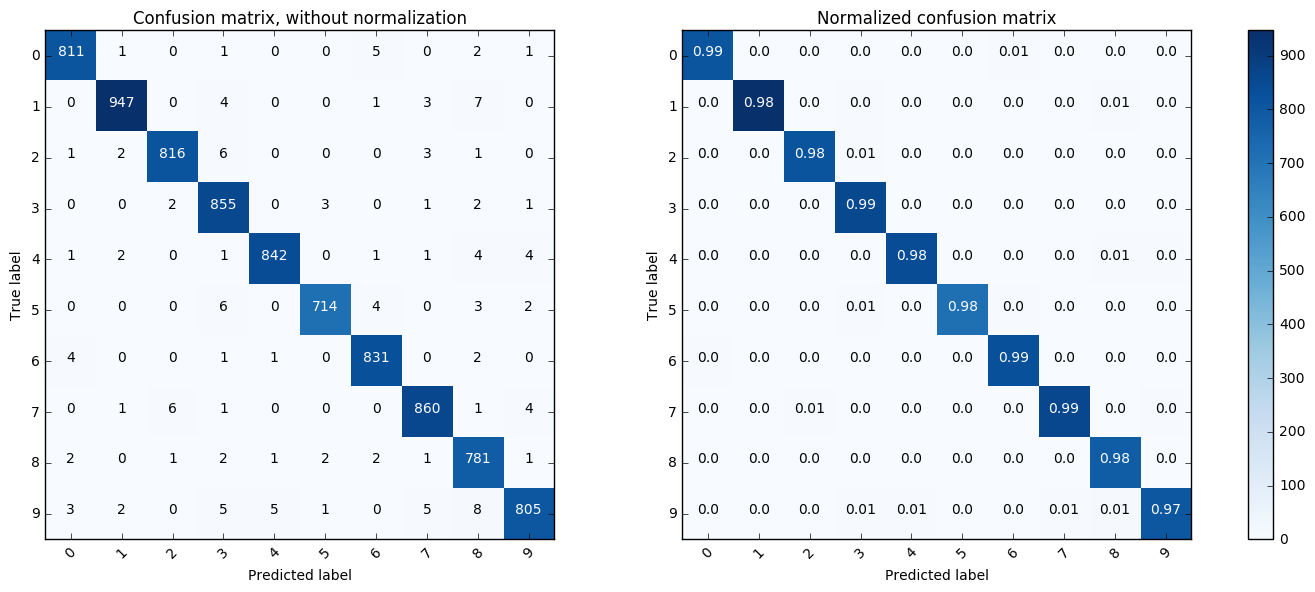

In [135]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(ytest, Y)
#print(cnf_matrix)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (18,6), dpi=150)
plt.subplot(1,2,1)
plot_confusion_matrix(cnf_matrix, classes=range(10),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(1,2,2)
plot_confusion_matrix(cnf_matrix, classes=range(10), normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()
plt.show()

In [109]:
model.layers[0].get_weights()

[array([[[[ -4.18e-02,  -7.05e-02,  -5.38e-02],
          [ -4.75e-02,  -2.51e-02,  -7.05e-03],
          [ -8.99e-02,   8.42e-02,   1.98e-02]]],
 
 
        [[[ -7.81e-02,  -3.64e-02,  -1.35e-02],
          [ -8.88e-02,   1.10e-01,  -6.66e-02],
          [  5.38e-02,   5.12e-02,  -2.61e-02]]],
 
 
        [[[ -1.23e-02,  -8.43e-03,  -2.34e-04],
          [ -3.94e-02,  -3.92e-02,  -2.02e-02],
          [ -1.80e-02,  -1.30e-01,  -5.02e-02]]],
 
 
        [[[ -8.93e-02,   6.58e-03,   7.07e-02],
          [ -5.06e-02,   1.23e-01,   1.32e-02],
          [  2.33e-02,   1.27e-02,  -1.21e-01]]],
 
 
        [[[  7.33e-03,   8.07e-02,  -8.88e-02],
          [ -8.65e-02,  -1.48e-02,   5.51e-02],
          [ -8.83e-02,  -5.73e-02,  -9.75e-02]]],
 
 
        [[[  4.69e-02,  -5.46e-02,   2.11e-03],
          [ -4.29e-02,   7.23e-02,  -1.64e-02],
          [ -5.56e-04,  -3.42e-02,   5.63e-02]]],
 
 
        [[[ -1.31e-01,  -1.16e-01,  -1.19e-01],
          [  5.10e-02,   6.04e-02,  -1.52e-02],
    

Calculate the labels on the test set and save the result as CSV file:

In [142]:
ypred=model.predict(X_Test)
Y=np.zeros((len(ypred),1))
for i in range(len(ypred)):
    Y[i]=np.where(ypred[i,:] == np.max(ypred[i,:]))
np.savetxt('submission6.csv',Y,delimiter=',',fmt='%.2f')

Show some random images of digits form test set and show the predicted label based on the fitted model:

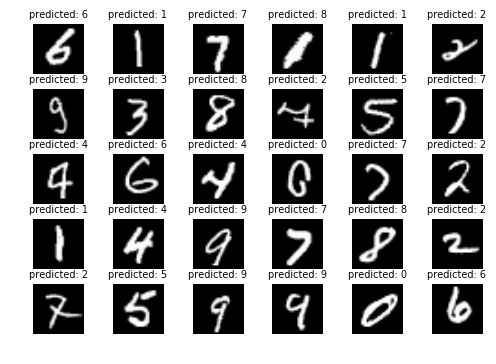

In [143]:
plt.figure(1)

for i in range(1,31):
    plt.subplot(5,6,i)
    Ind=int(np.random.randint(27999, size=1))
    plt.imshow(X_Test[Ind,0,:,:],cmap='gray')
    plt.title('predicted: %s'%int(Y[Ind,0]), fontsize= 7)
    plt.axis('off')
    plt.subplots_adjust(hspace=.3)
plt.show()